## Imports

In [1]:
# Import packages
import pandas as pd
import numpy as np

import scipy.stats as stats
import pingouin as pg

import random
from random import randrange

import matplotlib.pyplot as plt
import seaborn as sns

import Orthoscripts

#### Import genelists

In [2]:
# Asterias rubens
Astrub = Orthoscripts.readBED("Data/Genelists/Asterias.rubens.genelist.bed")

# Holothuria leucospilota
Holleu = Orthoscripts.readBED("Data/Genelists/Holothuria.leucospilota.genelist.bed")

# Paracentrotus livides
Parliv = Orthoscripts.readBED("Data/Genelists/Paracentrotus.lividus.genelist.bed")

# Branchiostoma lanceolatum
Bralan = Orthoscripts.readBED("Data/Genelists/Branchiostoma.lanceolatum.genelist.bed")

# Branchiostoma floridae
Braflo = Orthoscripts.readBED("Data/Genelists/Branchiostoma.floridae.genelist.bed", 's')

# Marthasterias glacialis
Margla = Orthoscripts.readBED("Data/Genelists/Marthasterias.glacialis.genelist.bed")

# Pecten maximus
Pecmax = Orthoscripts.readBED("Data/Genelists/Pecmax.genelist.bed", 's')

# Stichopus chloronotus
Stichl = Orthoscripts.readBED("Data/Genelists/Stichopus.chloronotus.genelist.bed")

# Amphiura filiformis 
Ampfil = Orthoscripts.readBED("Data/Genelists/Amphiura.filiformis.genelist.bed")

# Ephydatia muelleri
Ephmue = Orthoscripts.readBED("Data/Genelists/Ephmue.genelist.bed", 's')

# Ancestor 
AniAnc = Orthoscripts.readBED("Data/Genelists/AniAnc.genelist.bed", 's')
BilAnc = Orthoscripts.readBED("Data/Genelists/BilAnc.genelist.bed", 's')

#### Import ortholog files

In [3]:
# Import orthologs
Astrub_Holleu = np.loadtxt("Data/Orthologs/Asterias.rubens+Holothuria.leucospilota.txt", dtype = "str")

Astrub_Parliv = np.loadtxt("Data/Orthologs/Asterias.rubens+Paracentrotus.lividus.txt", dtype = "str")

Holleu_Parliv = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Paracentrotus.lividus.txt", dtype = "str")

Margla_Bralan = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Branchiostoma.lanceolatum.txt", dtype = "str")

Margla_Pecmax = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Pecten.maximus.txt", dtype = "str")

Margla_Stichl = np.loadtxt("Data/Orthologs/Marthasterias.glacialis+Stichopus.chloronotus.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Data/Orthologs/Pecten.maximus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Bralan = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Branchiostoma.lanceolatum.txt", dtype = "str")

Stichl_Pecmax = np.loadtxt("Data/Orthologs/Stichopus.chloronotus+Pecten.maximus.txt", dtype = "str")

Pecmax_Holleu = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Holleu_sensitive.txt", dtype = "str")

Holleu_Bralan = np.loadtxt("Orthology pipeline/orthologs/Holleu+Bralan_sensitive.txt", dtype = "str")

Pecmax_Bralan = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Bralan_sensitive.txt", dtype = "str")

Pecmax_Braflo = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Braflo_sensitive.txt", dtype = "str")

Holleu_Braflo = np.loadtxt("Orthology pipeline/orthologs/Holleu+Braflo_sensitive.txt", dtype = "str")

Holleu_Ampfil = np.loadtxt("Data/Orthologs/Holothuria.leucospilota+Amphiura.filiformis.txt", dtype = "str")

Braflo_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Braflo+Ephmue_sensitive.txt", dtype = "str")

Holleu_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Holleu+Ephmue_sensitive.txt", dtype = "str")

Pecmax_Ephmue = np.loadtxt("Orthology pipeline/orthologs/Pecmax+Ephmue_sensitive.txt", dtype = "str")

#### Sorting out the data

In [4]:
Astrub = Astrub.loc[Astrub['Chromosome'].str.contains('chr')]
Bralan = Bralan.loc[Bralan['Chromosome'].str.contains('BFL_')]
Braflo = Braflo.loc[Braflo['Chromosome'].str.contains('BFL_')]
Pecmax = Pecmax.loc[Pecmax['Chromosome'].str.contains('PYE_')]
Ephmue = Ephmue.loc[Ephmue['Chromosome'].str.contains('EMU_')]

# Ephmue genelist: remove suffix
Ephmue['Name'] = Ephmue['Name'].str.rsplit('.t1').str.get(0)

# Parliv genelist: select chromosomal scaffolds
Parliv = Orthoscripts.unscaff(Parliv, 100)
Ampfil = Orthoscripts.unscaff(Ampfil, 100)
Ephmue = Orthoscripts.unscaff(Ephmue, 600)

Astrub_Parliv = Orthoscripts.orthFix(Astrub_Parliv, 'B', 'Parliv_', 1)
Margla_Bralan = Orthoscripts.orthFix(Margla_Bralan, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'A', '.1', 0)
Margla_Stichl = Orthoscripts.orthFix(Margla_Stichl, 'B', '.1', 0)
Margla_Pecmax = Orthoscripts.orthFix(Margla_Pecmax, 'B', '.1', 0)
Holleu_Ampfil = Orthoscripts.orthFix(Holleu_Ampfil, 'B', '.1', 0)
Holleu_Bralan = Orthoscripts.orthFix(Holleu_Bralan, 'B', '_', 0)

### 
-----

### Plots

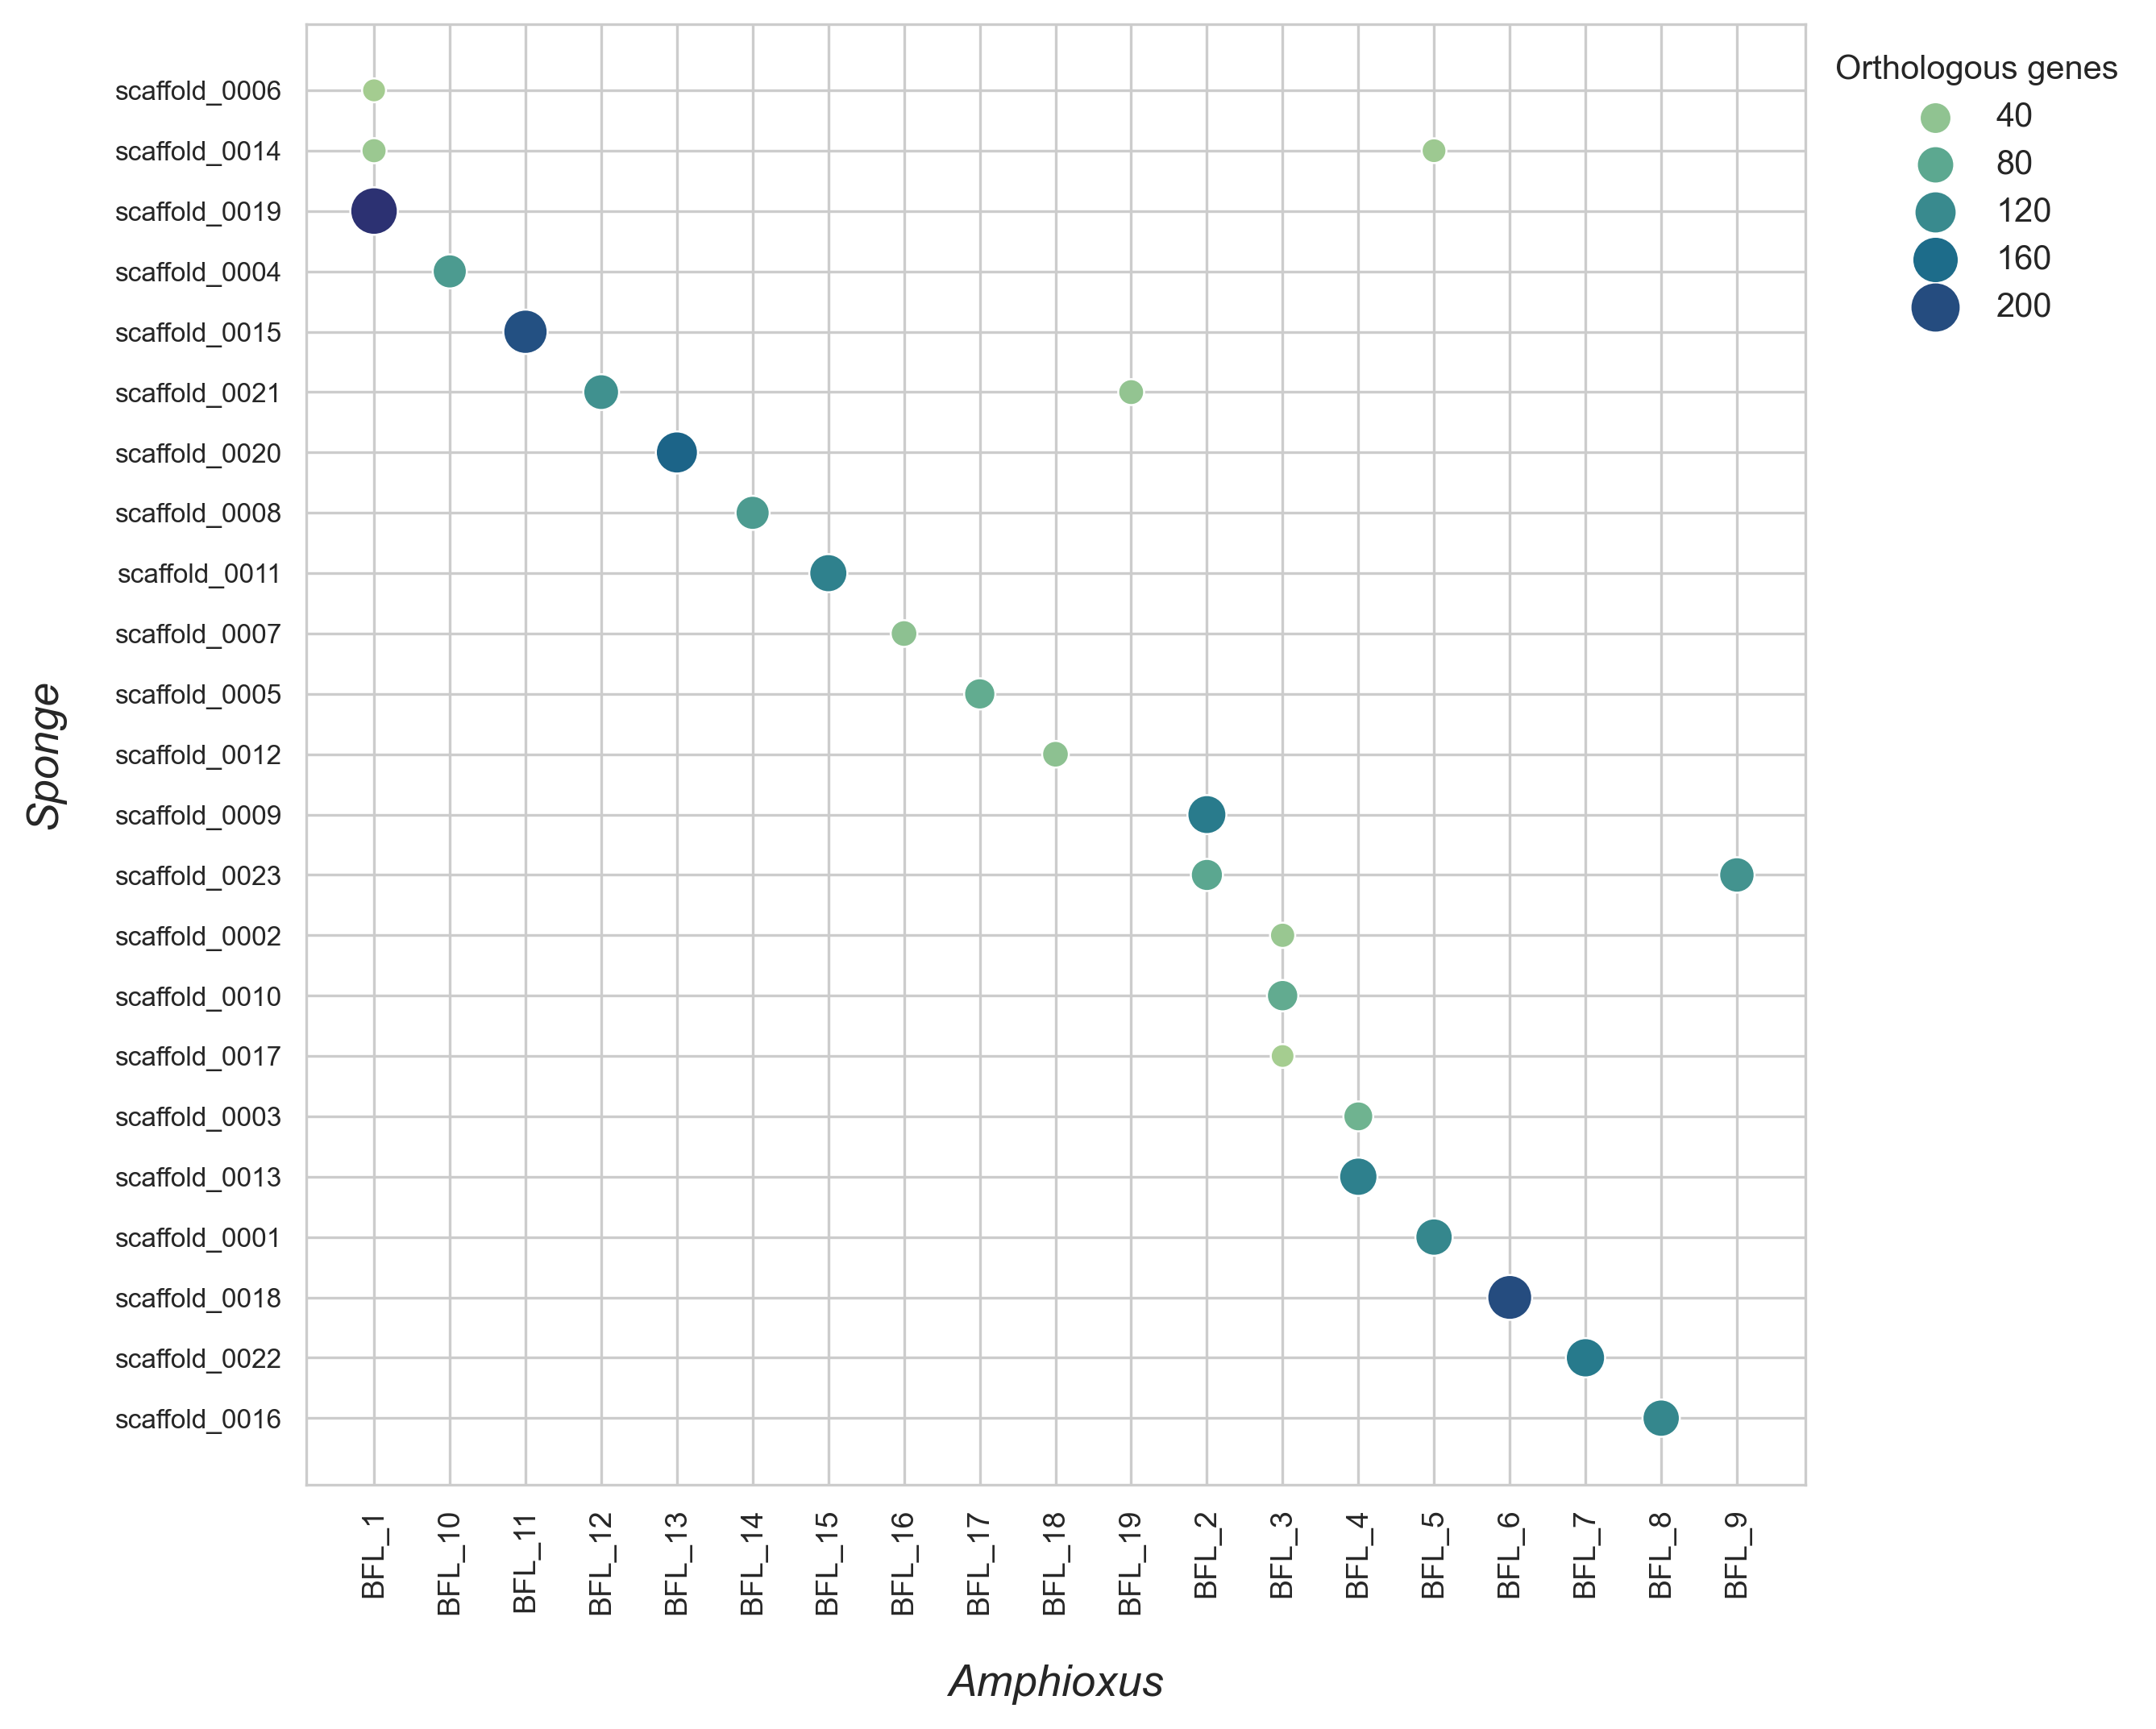

In [45]:
data = Orthoscripts.orthofind(Braflo, Ephmue, Braflo_Ephmue)
Orthoscripts.orthoplot(data, 'Amphioxus', 'Sponge', 'A', 'B')

-----
### Simulations

In [46]:
def makeancestor(Nchr, Ngene):
    ancestor = pd.DataFrame(columns = ['Chr'])
    for i in range(Nchr):
        row = {'Chr' : (i + 1)}
        for i in range(Ngene):
            ancestor = pd.concat([ancestor, pd.DataFrame([row])], ignore_index = True)
    ancestor['Genes'] = (ancestor.reset_index().index + 1)

    return ancestor

Nchr = 20
Ngene = 100
ancestor = makeancestor(Nchr, Ngene)
ancestor

,Chr,Genes
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
1995,20,1996
1996,20,1997
1997,20,1998
1998,20,1999


In [47]:
# Dummy BED files :: type 'anc' for ancestor, 'des' for descendant
def dummyBED(genome, type, outfile):
    if type == 'anc':
        genome['Chr'] = 'AncChr' + genome['Chr'].astype(str)
        genome['Genes'] = 'ancg_' + genome['Genes'].astype(str)
        
    if type == 'des':
        genome['Chr'] = 'Chr' + genome['Chr'].astype(str)
        genome['Genes'] = 'g_' + genome['Genes'].astype(str)
    
    genome['Start'] = np.arange(len(genome))
    genome['End'] = np.arange(len(genome)) + 5
    
    genome = genome[['Chr', 'Start', 'End', 'Genes']]
    
    with open(outfile, 'w') as out:
        out.write(genome.to_string(header = False, index = False))
        
    return genome

# Dummy ortholog file
def dummyOrthologs(genome, outfile):
    
    orthologs = pd.DataFrame()
    
    orthologs['Orthologs'] = np.arange(len(genome)) + 1
    orthologs['speciesA'] = np.arange(len(genome)) + 1
    orthologs['speciesB'] = np.arange(len(genome)) + 1
    
    orthologs['Orthologs'] = 'orthologs_' + orthologs['Orthologs'].astype(str)
    orthologs['speciesA'] = 'ancg_' + orthologs['speciesA'].astype(str)
    orthologs['speciesB'] = 'g_' + orthologs['speciesB'].astype(str)
    
    with open(outfile, 'w') as out:
        out.write(orthologs.to_string(header = False, index = False))

In [48]:
def fusion(genome, mixing = 0):
    '''
    inputs: 
    ancestor : df with chromosome name | gene name
    mixing : float between 0 and 1, where 1 implies extreme mixing and 0 implies no mixing
    '''
    
    # Randomly select two chromosomes to fuse
    fuse1 = random.choice(genome.Chr.unique())
    fuse2 = random.choice(genome.Chr.unique())
    
    if fuse1 == fuse2: # Just so the same chromosome isn't selected twice
        fuse2 = random.choice(range(1, len(genome.Chr.unique())))

    fusion = ancestor.loc[ancestor['Chr'].isin([fuse1, fuse2])]
    
    # Apply mixing if required
    if mixing > 0:
        genes = fusion['Genes'].to_numpy()
        n = len(genes)
        for i in range(int(mixing * n)):
            g1, g2 = randrange(n), randrange(n)
            genes[g2], genes[g1] = genes[g1], genes[g2]

        fusion['Genes'] = genes
        fusion['Chr'] = f'{fuse1}x{fuse2}'
        
    else:
         fusion['Chr'] = f'{fuse1}+{fuse2}'
    
    # Remove the unfused chromosomes
    genome.drop(genome[genome['Chr'].isin([fuse1, fuse2])].index, inplace = True)
    genome = pd.concat([genome, fusion])
    
    log = f'Fusion of AncChr{fuse1} and AncChr{fuse2} into Chr{fuse1}+{fuse2}'
    
    return genome, log

with pd.option_context('display.max_rows', None):
    print(fusion(ancestor))

(        Chr  Genes
0         1      1
1         1      2
2         1      3
3         1      4
4         1      5
5         1      6
6         1      7
7         1      8
8         1      9
9         1     10
10        1     11
11        1     12
12        1     13
13        1     14
14        1     15
15        1     16
16        1     17
17        1     18
18        1     19
19        1     20
20        1     21
21        1     22
22        1     23
23        1     24
24        1     25
25        1     26
26        1     27
27        1     28
28        1     29
29        1     30
30        1     31
31        1     32
32        1     33
33        1     34
34        1     35
35        1     36
36        1     37
37        1     38
38        1     39
39        1     40
40        1     41
41        1     42
42        1     43
43        1     44
44        1     45
45        1     46
46        1     47
47        1     48
48        1     49
49        1     50
50        1     51
51        1

In [49]:
def fission(genome):
    # Randomly select a chromosome for fission
    fiss = random.choice(genome.Chr.unique())
    fission = genome.loc[genome['Chr'] == fiss]

    pos = random.choice(range(1, Ngene))

    # Add the new chromosomes back into the genome
    chr1 = fission.iloc[: pos]
    chr1['Chr'] = f'{fiss}_1'
    chr2 = fission.iloc[pos :]
    chr2['Chr'] = f'{fiss}_2'
    
    # Remove the fission chromosome from the genome
    genome = pd.concat([genome, chr1, chr2])
    genome = genome[genome.Chr != fiss]
    
    log = f'Fission of AncChr{fiss} into Chr{fiss}_1 and Chr{fiss}_2'
    
    return genome, log

with pd.option_context('display.max_rows', None):
    print(fission(ancestor))

(      Chr  Genes
0       1      1
1       1      2
2       1      3
3       1      4
4       1      5
5       1      6
6       1      7
7       1      8
8       1      9
9       1     10
10      1     11
11      1     12
12      1     13
13      1     14
14      1     15
15      1     16
16      1     17
17      1     18
18      1     19
19      1     20
20      1     21
21      1     22
22      1     23
23      1     24
24      1     25
25      1     26
26      1     27
27      1     28
28      1     29
29      1     30
30      1     31
31      1     32
32      1     33
33      1     34
34      1     35
35      1     36
36      1     37
37      1     38
38      1     39
39      1     40
40      1     41
41      1     42
42      1     43
43      1     44
44      1     45
45      1     46
46      1     47
47      1     48
48      1     49
49      1     50
50      1     51
51      1     52
52      1     53
53      1     54
54      1     55
55      1     56
56      1     57
57      1    

In [50]:
def translocation(genome):
    # Randomly select two chromosomes for translocation
    cA = random.choice(genome.Chr.unique())
    cB = random.choice(genome.Chr.unique())
    
    chrA = genome.loc[genome['Chr'] == cA]
    chrB = genome.loc[genome['Chr'] == cB]
    
    # Randomly select two break point positions
    posA = random.choice(range(1, Ngene))
    posB = random.choice(range(1, Ngene))
    
    # Join the fragments to form recombinant chromosomes
    chr1 = pd.concat([chrA.iloc[: posA], chrB.iloc[posB :]])
    chr1['Chr'] = f'{cA};{cB}'
    chr2 = pd.concat([chrB.iloc[: posB], chrA.iloc[posA :]])
    chr2['Chr'] = f'{cA};{cB}'
    
    # Remove the original chromosomes from the genome
    genome = pd.concat([genome, chr1, chr2]).drop(genome[(genome['Chr'] == cA) & (genome['Chr'] == cB)].index)
    
    log = f'Translocation between AncChr{cA} and AncChr{cB}'
    
    return genome, log

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(translocation(ancestor))

(       Chr  Genes
0        1      1
1        1      2
2        1      3
3        1      4
4        1      5
5        1      6
6        1      7
7        1      8
8        1      9
9        1     10
10       1     11
11       1     12
12       1     13
13       1     14
14       1     15
15       1     16
16       1     17
17       1     18
18       1     19
19       1     20
20       1     21
21       1     22
22       1     23
23       1     24
24       1     25
25       1     26
26       1     27
27       1     28
28       1     29
29       1     30
30       1     31
31       1     32
32       1     33
33       1     34
34       1     35
35       1     36
36       1     37
37       1     38
38       1     39
39       1     40
40       1     41
41       1     42
42       1     43
43       1     44
44       1     45
45       1     46
46       1     47
47       1     48
48       1     49
49       1     50
50       1     51
51       1     52
52       1     53
53       1     54
54       

In [51]:
def synteny_loss(genome):
    syn = random.choice(genome.Chr.unique())
    synchr = genome.loc[genome['Chr'] == syn]
    genome = genome[genome.Chr != syn]
    
    # Assign all elements to a random chromosome
    synchr['Chr'] = random.choices(genome.Chr.unique(), k = len(synchr))
    
    # Add back into the genome
    genome = pd.concat([genome, synchr])
    
    log = f'Synteny loss of AncChr{syn}'

    return genome, log

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(synteny_loss(ancestor))

(     Chr  Genes
0      1      1
1      1      2
2      1      3
3      1      4
4      1      5
5      1      6
6      1      7
7      1      8
8      1      9
9      1     10
10     1     11
11     1     12
12     1     13
13     1     14
14     1     15
15     1     16
16     1     17
17     1     18
18     1     19
19     1     20
20     1     21
21     1     22
22     1     23
23     1     24
24     1     25
25     1     26
26     1     27
27     1     28
28     1     29
29     1     30
30     1     31
31     1     32
32     1     33
33     1     34
34     1     35
35     1     36
36     1     37
37     1     38
38     1     39
39     1     40
40     1     41
41     1     42
42     1     43
43     1     44
44     1     45
45     1     46
46     1     47
47     1     48
48     1     49
49     1     50
50     1     51
51     1     52
52     1     53
53     1     54
54     1     55
55     1     56
56     1     57
57     1     58
58     1     59
59     1     60
60     1     61
61     

In [52]:
speciesA = makeancestor(Nchr, Ngene)

speciesA, log = fission(speciesA)
print(log)

speciesA, log = fusion(speciesA)
print(log)

speciesA, log = fusion(speciesA, 0.5)
print(log)

with pd.option_context('display.max_rows', None):
    print(speciesA)

Fission of AncChr5 into Chr5_1 and Chr5_2
Fusion of AncChr10 and AncChr1 into Chr10+1
Fusion of AncChr19 and AncChr7 into Chr19+7
       Chr  Genes
100      2    101
101      2    102
102      2    103
103      2    104
104      2    105
105      2    106
106      2    107
107      2    108
108      2    109
109      2    110
110      2    111
111      2    112
112      2    113
113      2    114
114      2    115
115      2    116
116      2    117
117      2    118
118      2    119
119      2    120
120      2    121
121      2    122
122      2    123
123      2    124
124      2    125
125      2    126
126      2    127
127      2    128
128      2    129
129      2    130
130      2    131
131      2    132
132      2    133
133      2    134
134      2    135
135      2    136
136      2    137
137      2    138
138      2    139
139      2    140
140      2    141
141      2    142
142      2    143
143      2    144
144      2    145
145      2    146
146      2    147
147   

------------------------------

### Test simulations

In [53]:
def orthofind(genelistA, genelistB, orthologies):
    
    """
    inputs:
    genelistA: 
        gene list for species A
    genelistB: 
        gene list for species B
    orthologies: 
        orthology dataset 
    
    outputs: dataframe with significant ortholog combinations 
             and their location in species A and B and p-Values
    """
    
    # make ortholog dictionaries (ortholog : gene name)
    orthdictA = dict(zip(orthologies[:, 1], orthologies[:, 0]))
    orthdictB = dict(zip(orthologies[:, 2], orthologies[:, 0]))

    # replace genelist values with ortholog dictionary keys
    A_data = genelistA.copy()
    B_data = genelistB.copy()
    A_data['Name'] = A_data['Name'].map(lambda x: orthdictA.get(x, x))
    B_data['Name'] = B_data['Name'].map(lambda x: orthdictB.get(x, x))
    
    # make orthology location dictionaries (ortholog : chromosome)
    dictA = dict(zip(A_data.loc[A_data['Name'].str.contains('ortholog')].Name, 
                     A_data.loc[A_data['Name'].str.contains('ortholog')].Chromosome))
    dictB = dict(zip(B_data.loc[B_data['Name'].str.contains('ortholog')].Name, 
                     B_data.loc[B_data['Name'].str.contains('ortholog')].Chromosome))
    
    # seperate all orthology entries into new dataframe
    AB_data = pd.DataFrame({'Orthologs': orthologies[:, 0],
                            'A' : orthologies[:, 0],
                            'B' : orthologies[:, 0]})
    
    # replace location in A and B with ortholog location dictionary keys
    AB_data['A'] = AB_data['A'].map(dictA)
    AB_data['B'] = AB_data['B'].map(dictB)
    
    # calculate number of orthologs for each pair of chromosomes
    AB_data = AB_data.groupby(['A', 'B']).count().reset_index()
    
    return AB_data

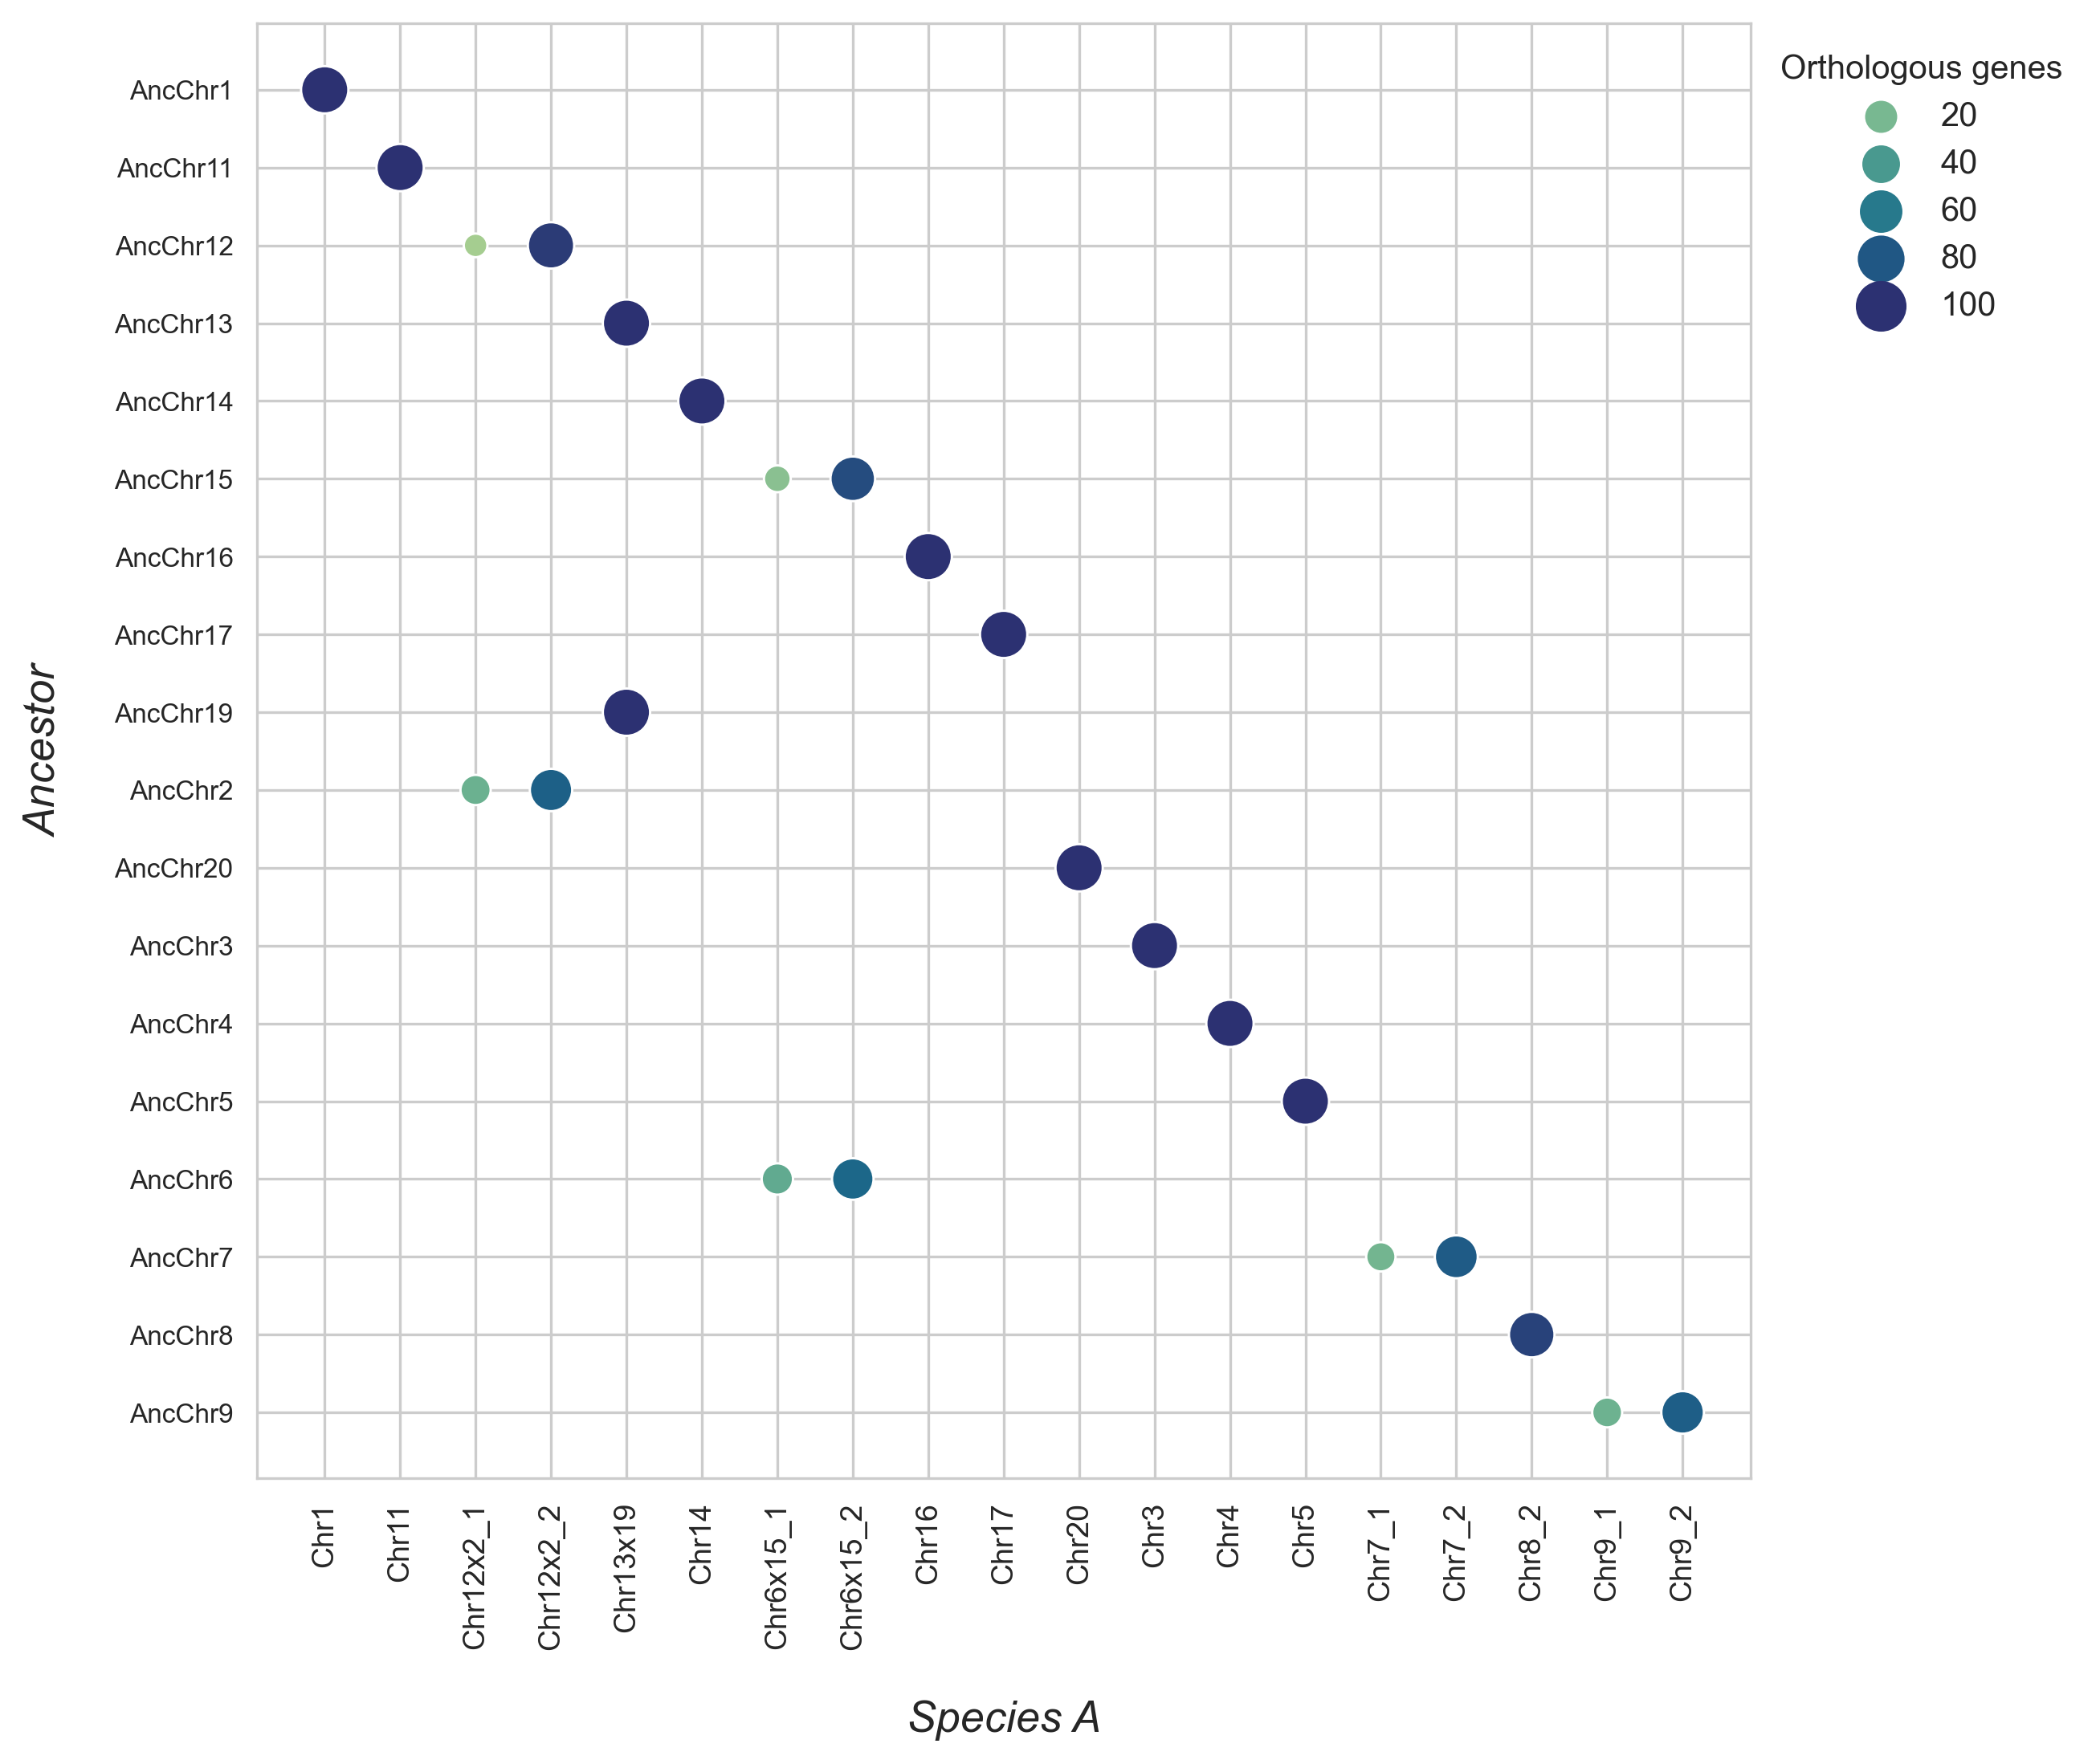

In [69]:
# Import 
anc = Orthoscripts.readBED("Simulations/Ancestor.genelist.bed", 's')
spA = Orthoscripts.readBED("Simulations/SpeciesA.genelist.bed", 's')
orth = np.loadtxt("Simulations/Ancestor+SpeciesA.txt", dtype = "str")

simO = orthofind(anc, spA, orth)

Orthoscripts.orthoplot(simO, 'Species A', 'Ancestor', 'B', 'A')

In [77]:
simO

,A,B,Orthologs
0,AncChr1,Chr1,100
1,AncChr11,Chr11,100
2,AncChr12,Chr12x2_1,5
3,AncChr12,Chr12x2_2,95
4,AncChr13,Chr13x19,100
5,AncChr14,Chr14,100
6,AncChr15,Chr6x15_1,14
7,AncChr15,Chr6x15_2,86
8,AncChr16,Chr16,100
9,AncChr17,Chr17,100


In [71]:
Orthoscripts.rearrangements(orthofind(anc, spA, orth))

Fission of ancestral chromosome AncChr12 into ['Chr12x2_1', 'Chr12x2_2']
Fission of ancestral chromosome AncChr15 into ['Chr6x15_1', 'Chr6x15_2']
Fission of ancestral chromosome AncChr2 into ['Chr12x2_1', 'Chr12x2_2']
Fission of ancestral chromosome AncChr6 into ['Chr6x15_1', 'Chr6x15_2']
Fission of ancestral chromosome AncChr7 into ['Chr7_1', 'Chr7_2']
Fission of ancestral chromosome AncChr9 into ['Chr9_1', 'Chr9_2']
Fusion of ancestral chromosomes ['AncChr12', 'AncChr2'] into Chr12x2_1
Fusion of ancestral chromosomes ['AncChr12', 'AncChr2'] into Chr12x2_2
Fusion of ancestral chromosomes ['AncChr13', 'AncChr19'] into Chr13x19
Fusion of ancestral chromosomes ['AncChr15', 'AncChr6'] into Chr6x15_1
Fusion of ancestral chromosomes ['AncChr15', 'AncChr6'] into Chr6x15_2


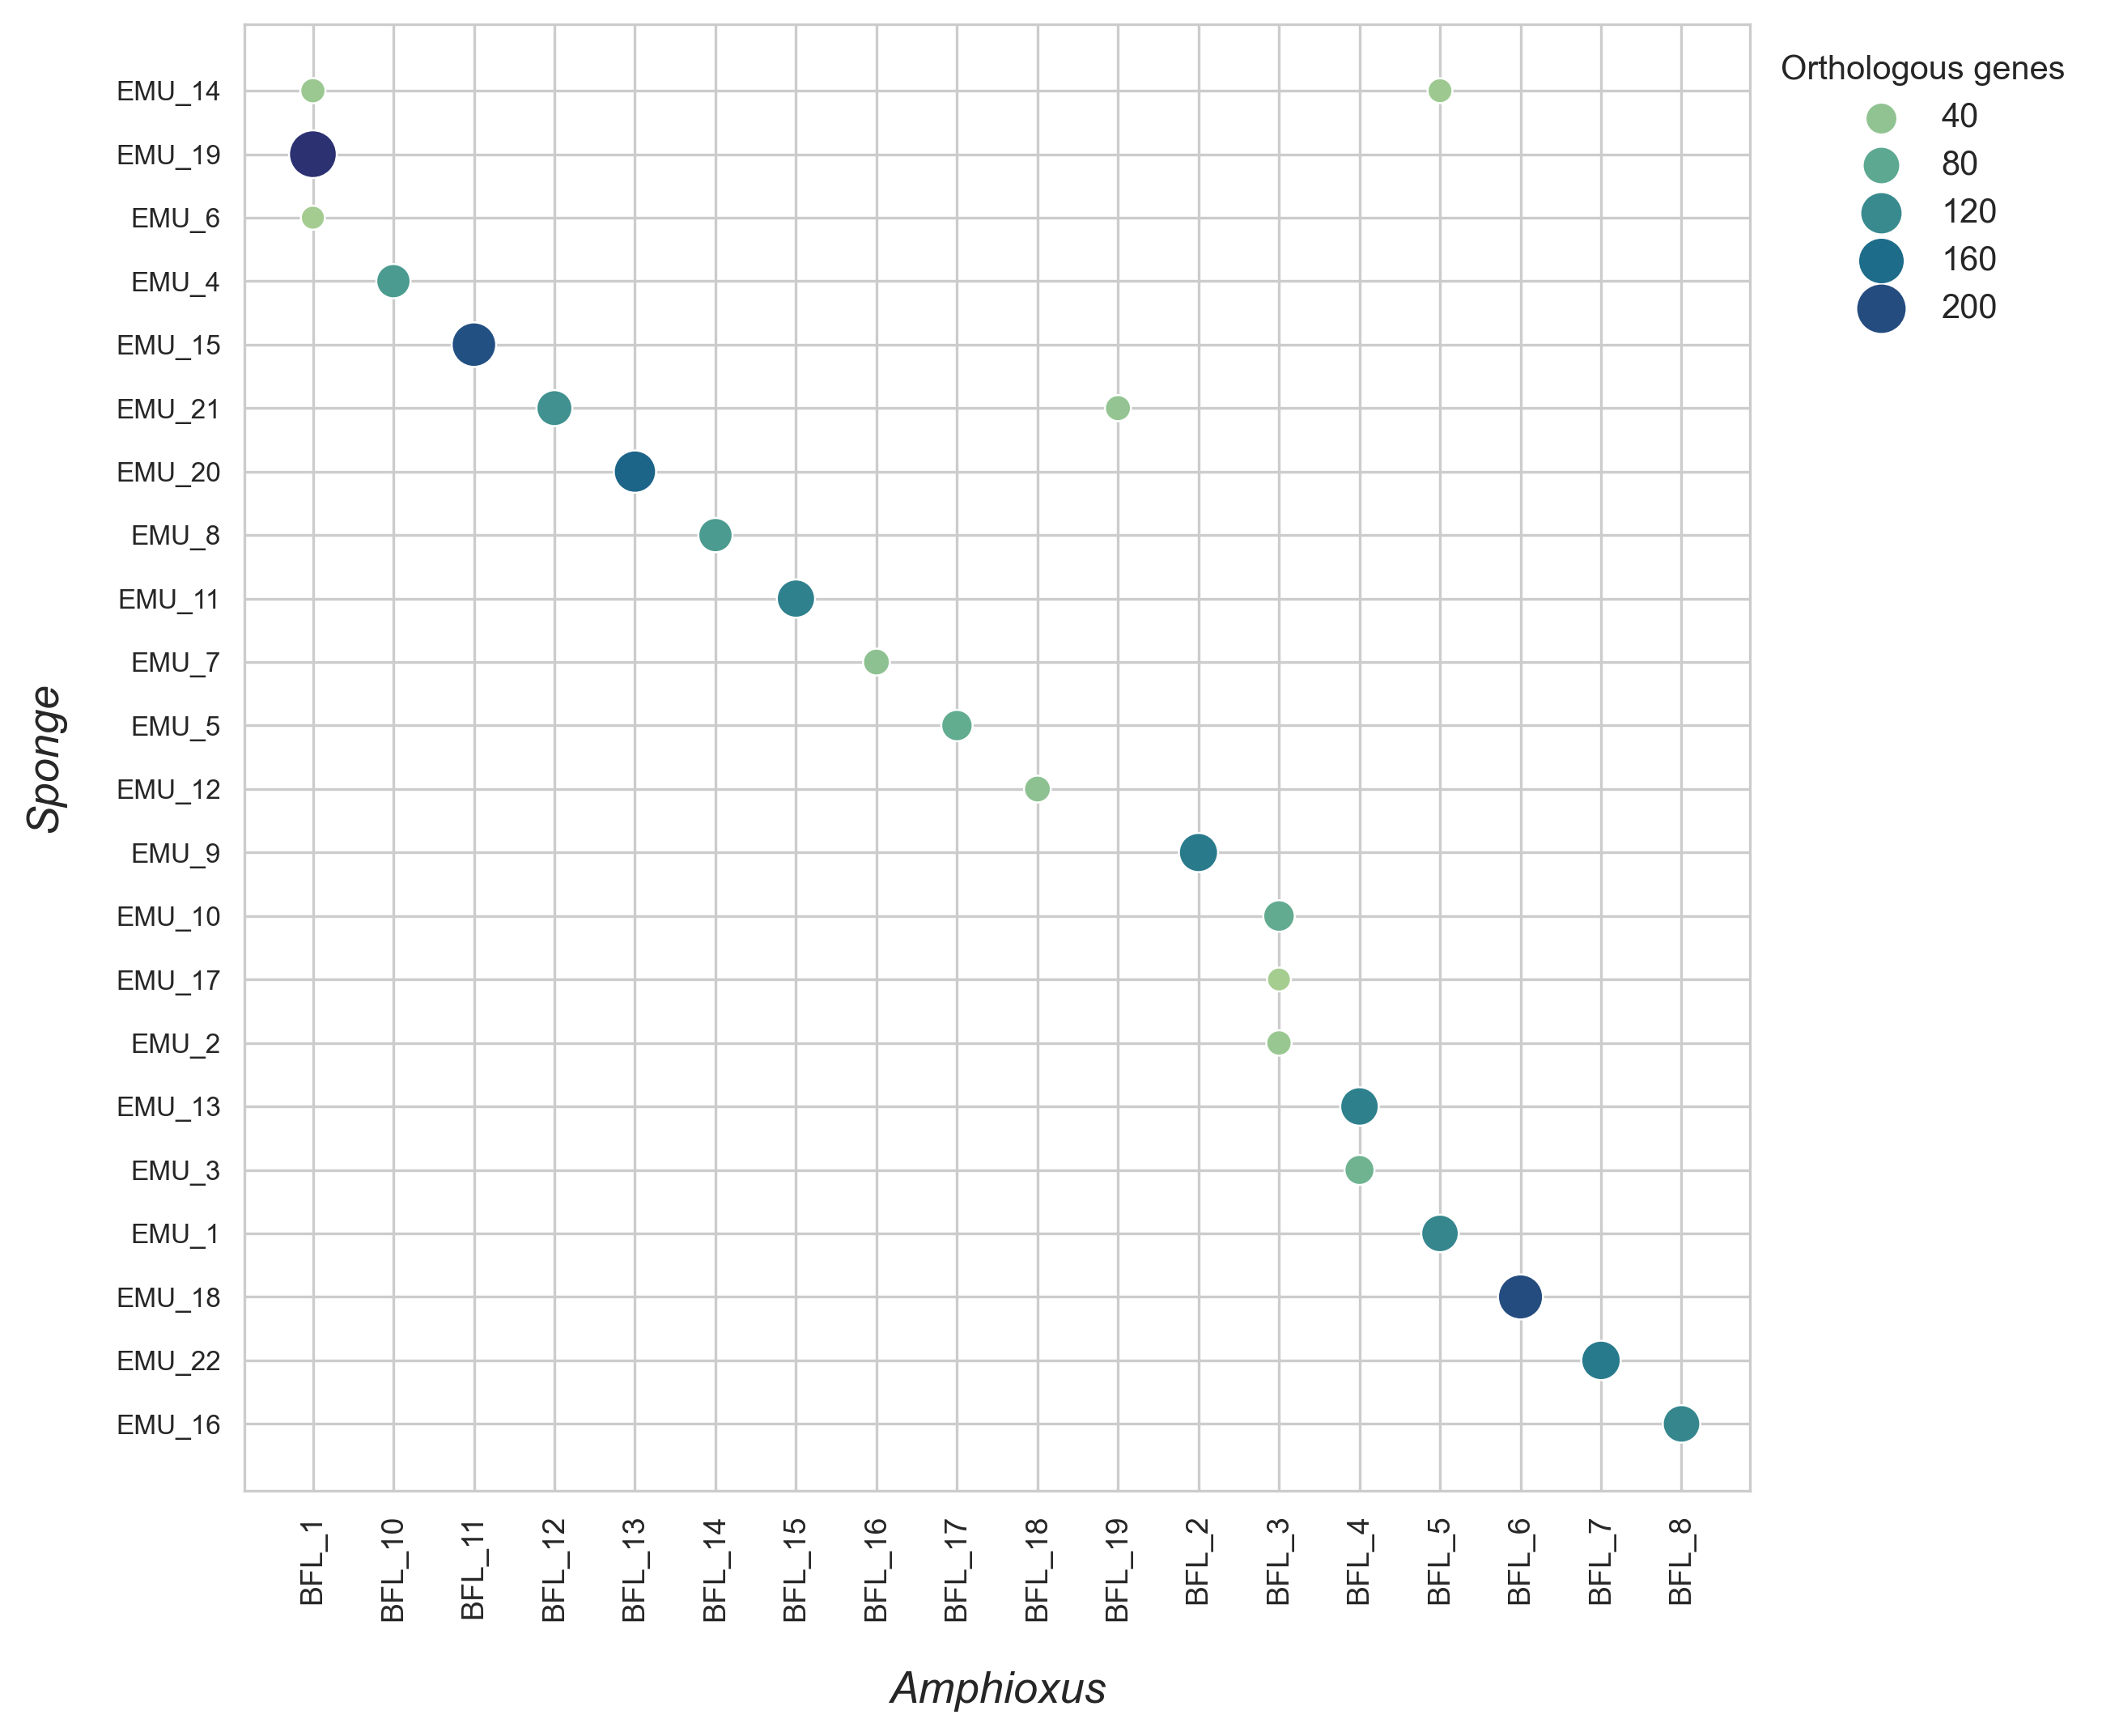

In [14]:
data = Orthoscripts.orthofind(Braflo, Ephmue, Braflo_Ephmue)
Orthoscripts.orthoplot(data, 'Amphioxus', 'Sponge', 'A', 'B')

In [15]:
fissions = data.pivot(index = 'A', columns='B', values = 'Orthologs')
fissions = fissions.loc[(fissions.where(fissions.isnull(), 1).sum(axis=1) > 1) | (fissions.sum(axis=0) > 1)]
fissions = fissions.stack(dropna = True).reset_index().groupby('A')['B'].apply(list).reset_index(name = 'B')
fissions

,A,B
0,BFL_1,"[EMU_14, EMU_19, EMU_6]"
1,BFL_3,"[EMU_10, EMU_17, EMU_2]"
2,BFL_4,"[EMU_13, EMU_3]"
3,BFL_5,"[EMU_1, EMU_14]"


In [16]:
fusions = data.pivot(index = 'B', columns='A', values = 'Orthologs')
fusions = fusions.loc[(fusions.where(fusions.isnull(), 1).sum(axis=1) > 1) | (fusions.sum(axis=0) > 1)]
fusions = fusions.stack(dropna = True).reset_index().groupby('B')['A'].apply(list).reset_index(name = 'A')
fusions

,B,A
0,EMU_14,"[BFL_1, BFL_5]"
1,EMU_21,"[BFL_12, BFL_19]"
